In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

In [2]:
from ase import Atoms
from ase.io import read,write

In [3]:
ll_list = [0.1, 0.4, 0.6, 0.8, 0.9, 0.95, 0.99]
cc_list = [4, 5, 5.5, '4-mp1']

In [4]:
ll_list.reverse()

In [5]:
q_all = {}

In [6]:
q_full = np.concatenate( (np.array([1 for _ in range(64)]), np.array([-1 for _ in range(64)]) ))

In [7]:
q_full

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1])

In [8]:
q_all = {}
for cc in cc_list:
    q_all[cc] = {}
    for ll in ll_list:
        q_all[cc][ll] = read('r-more-A64B64-samestep-lc-'+str(ll)+'-c-'+str(cc)+'/q-test.xyz').arrays['q'] /9.4893
        if (np.mean(q_all[cc][ll] * q_full) < 0):
            q_all[cc][ll] *= -1
        #print(cc, ll, np.mean(q_all[cc][ll] * q_full)/np.mean(q_full * q_full))

In [9]:
lc = {}
for cc in cc_list:
    # cutoff lambda e_mae e_rmse f_mae f_rmse q_mae q_rmse
    lc[cc] = np.genfromtxt('samestep-lc-'+str(cc)+'.dat')
    

In [10]:
sr_lc = {}
for cc in cc_list:
    # cutoff lambda e_mae e_rmse f_mae f_rmse
    sr_lc[cc] = np.genfromtxt('sr-lc-'+str(cc)+'.dat')

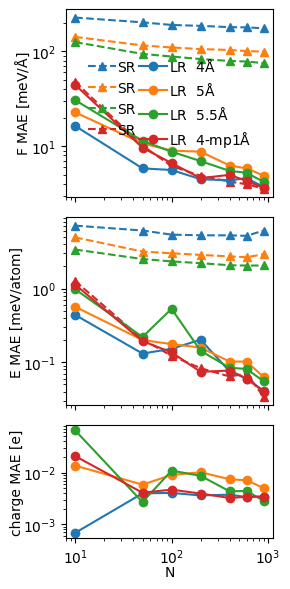

In [11]:
fig, axs = plt.subplots(3, 1, figsize=(3., 6), sharex=True, height_ratios=[1,1,0.6])

ax = axs[0]
for i, cc in enumerate(cc_list):
    lc_now = sr_lc[cc]
    ax.plot(lc_now[:,1]*1000, lc_now[:,4]*1000, '^--',
            c=cm.tab10(i),
            label='SR')
    
for i, cc in enumerate(cc_list):    
    lc_now = lc[cc]
    ax.plot(lc_now[:,1]*1000, lc_now[:,4]*1000, 'o-',
            c=cm.tab10(i),
            label='LR  '+str(cc)+'$\mathrm{\AA}$')

ax.loglog()
ax.legend(ncol=2, frameon=False, fontsize=10,  columnspacing=0.3, handletextpad=0.1)

#ax.set_xlabel('N')
ax.set_ylabel('F MAE [meV/$\mathrm{\AA}$]',labelpad=-1)

ax = axs[1]
for i, cc in enumerate(cc_list):
    lc_now = sr_lc[cc]
    ax.plot(lc_now[:,1]*1000, lc_now[:,2]*1000, '^--',
            c=cm.tab10(i),
            label='SR')
    
for i, cc in enumerate(cc_list):    
    lc_now = lc[cc]
    ax.plot(lc_now[:,1]*1000, lc_now[:,2]*1000, 'o-',
            c=cm.tab10(i),
            label='LR $r_\mathrm{cut}=$'+str(cc))

ax.loglog()
#ax.legend(ncol=2, frameon=False)

#ax.set_xlabel('N')
ax.set_ylabel('E MAE [meV/atom]',labelpad=-1)

ax = axs[2]
    
for i, cc in enumerate(cc_list):    
    lc_now = lc[cc]
    ax.plot(lc_now[:,1]*1000, lc_now[:,6], 'o-',
            c=cm.tab10(i),
            label='LR $r_\mathrm{cut}=$'+str(cc))

ax.loglog()
#ax.legend(ncol=2, frameon=False)

ax.set_xlabel('N',labelpad=-1)
ax.set_ylabel('charge MAE [e]',labelpad=-1)

fig.tight_layout()

fig.savefig('random_charge_lc.pdf', dpi=300)

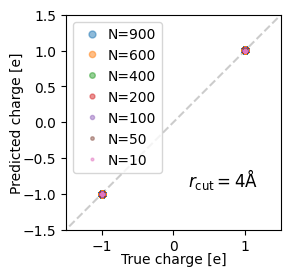

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(3, 3))


cc=4
ax.plot(np.array([-2,2]), np.array([-2,2]),'k--',alpha=0.2)
for i,ll in enumerate(ll_list[::-1]):
    nn = int(1000*(1.-ll)+0.0001)
    ax.plot(q_full, q_all[cc][ll], '.', label='N='+str(nn), ms=10-i, alpha=0.5)
    
ax.set_xlim([-1.5,1.5])
ax.set_ylim([-1.5,1.5])

ax.set_box_aspect(1)

ax.set_xlabel('True charge [e]',labelpad=-1)
ax.set_ylabel('Predicted charge [e]',labelpad=-1)

ax.legend(#bbox_to_anchor=(0.91, 0.9), 
          fontsize=10,
          columnspacing=0.3, handletextpad=0.1, frameon=True, ncol=1)

ax.text( 0.2, -0.9, '$r_\mathrm{cut}=4\mathrm{\AA}$', fontsize=12)

fig.tight_layout()

fig.savefig('random_charge_q.pdf', dpi=300)